# Tarea2
## Isaac Muñoz Estrada

### 1. Histograma

#### Código

In [1]:
"""
<center><h1>`HISTOGRAMA`</h1></center>
<hr></hr>
**Nombre:**\n
histograma\n
**Sinopsis:**\n
histograma(n,o)\n
**Descripción:**\n
El programa genera arreglo de números al azar (a). Después cuenta la cantidad de este elementos dentro 
de los subintervalos (bins) de la partición de [min(a), max(a)] en "n" partes iguales. Por defecto el
programa regresa un arreglo de "n" elementos enteros (c). Donde c[i] es el número de elemtnos de a que
están en el intervalo [i, i+(max(a)-min(a))/n).\n

La opción "o" solo acepta el valor 1. Entonces regresa una tupla de 3 elementos, el arreglo c, el arreglo a,
y los bins en forma de un rango.\n

**Nota:**\n
Es necesario utilizar `using PyPlot` de antemano para que la función pueda graficar los datos.\n
**Autor:**\n
Isaac Muñoz Estrada
"""


function histograma(n::Int64, o::Int64 = 0)
    
    #Arreglos
    a = sort(randn(1000))       #Crea un arreglo con 1000 números Float64 al azar ordenados
    c = zeros(Array{Int64}(n))  #Crea un arreglo con n ceros que contará las ocurrencias
    c[n] = 1                    #El último lugar de c es 1, esto para compensar en el 
                                #conteo del último intervalo
    
    am = minimum(a)             #Crea una variable con el mínimo del arreglo a
    aM = maximum(a)        #Crea una variable con el máximo del arreglo a
    da = (aM - am) / n           #Longitud de los intervalos
    
    #println("Min: ", am,"\tMax: ", aM, "\tLongitud del bin: ", da)
    
    bins = am:da:aM
    
    j = 1
    k = 1
    
    for i in bins
        
        while k <= n
            
            if (i <= a[j] < (i + da )) #Pregunta si a[j] está en el bin
                
                c[k] = c[k] + 1        #Si está agrega 1 a c[k] que es el contador de
                                       #de ocurrencias en el bin[i]
                j = j + 1              #Procede a verificar si el siguiente lugar en a
                                       #está en el bin
            else
                
                break                  #Si a[j] no está en el bin deja de contar las
                                       #ocurrencias
            end
            #Fin de if
        end
        #Fin de while
                                       #println( c[k], "\t", i, "\t", i + Δx)
        k = k + 1                      #Cambia el contador del bin al siguiente
        
    end
    #Fin de for
    
    #Graficado
    figure(figsize=(6,4))
    title("Histograma")
    xlabel("Bins")
    ylabel("Ocurrencias")
    fill_between(1:1:n, c, color="black") #Una variación de plot que rellena polígonos
   
    #Regreso de los valores según la opción
    if o == 1
        return c,a,bins
    else
        return c
    end
    #Fin de if
end
#Fin de histograma

histograma (generic function with 2 methods)

### Documentación

In [2]:
?histograma

search: 

<center><h1>`HISTOGRAMA`</h1></center> <hr></hr> **Nombre:**

histograma

**Sinopsis:**

histograma(n,o)

**Descripción:**

El programa genera arreglo de números al azar (a). Después cuenta la cantidad de este elementos dentro  de los subintervalos (bins) de la partición de [min(a), max(a)] en "n" partes iguales. Por defecto el programa regresa un arreglo de "n" elementos enteros (c). Donde c[i] es el número de elemtnos de a que están en el intervalo [i, i+(max(a)-min(a))/n).

La opción "o" solo acepta el valor 1. Entonces regresa una tupla de 3 elementos, el arreglo c, el arreglo a, y los bins en forma de un rango.

**Nota:**

Es necesario utilizar `using PyPlot` de antemano para que la función pueda graficar los datos.

**Autor:**

Isaac Muñoz Estrada


### Ejemplo

Abajo se muestra la función histograma funcionando con 100 bins. Usando primero `using PyPlot` para poder graficar.

histograma



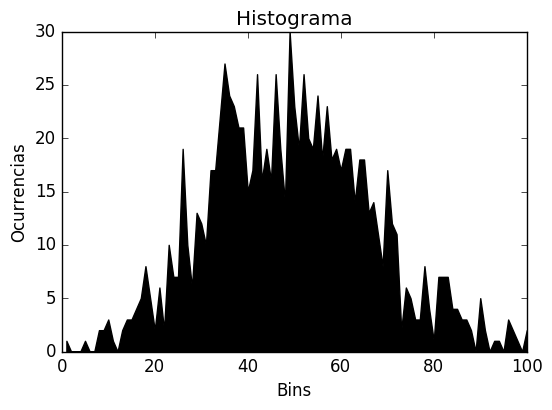

100-element Array{Int64,1}:
 1
 0
 0
 0
 1
 0
 0
 2
 2
 3
 1
 0
 2
 ⋮
 0
 5
 2
 0
 1
 1
 0
 3
 2
 1
 0
 2

In [3]:
using PyPlot
histograma(100)

Ahora se utiliza almacena la salida de la función en la variable `datos`. Esto con el fin de utilizarlos para la comparación con la función de graficado de histogramas.

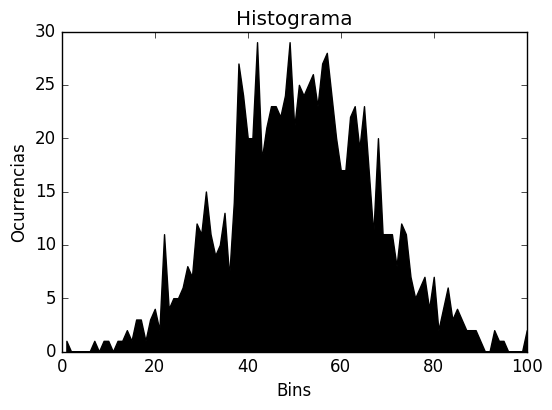

In [4]:
datos = histograma(100,1);

Aquí se utiliza la función de graficado de histogramas. Utilizando los elementos 2 y 3 de `datos`. Estos son, los números al azar generados y los bins en forma de rango utilizandos para el conteo.

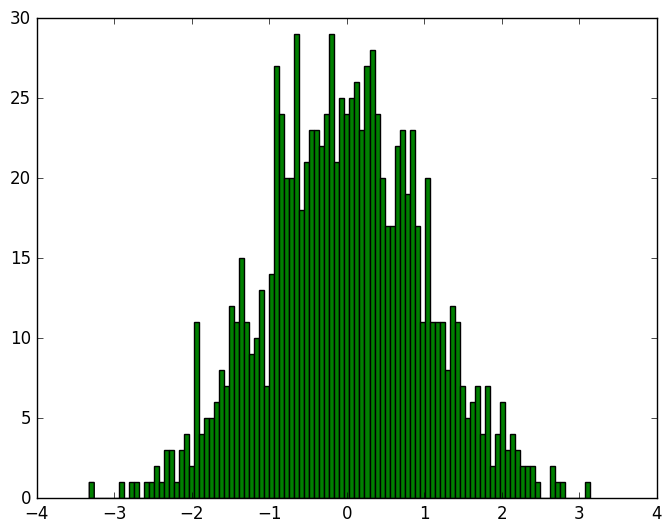

([1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0  …  0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0],[-3.32361,-3.25903,-3.19445,-3.12987,-3.06529,-3.00071,-2.93613,-2.87155,-2.80697,-2.74239  …  2.55311,2.61769,2.68227,2.74684,2.81142,2.876,2.94058,3.00516,3.06974,3.13432],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f269b5b10f0>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b56df98>,PyObject <matplotlib.patches.Rectangle object at 0x7f269e316cf8>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b50a438>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b512fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b57bf28>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b518550>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b506c50>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b51dda0>,PyObject <matplotlib.patches.Rectangle object at 0x7f269b50af60>  …  PyObject <matplotlib.patches.Rectangle object at 0x7f269b42fda0>,PyObject <matplo

In [5]:
plt[:hist](datos[2],datos[3], color="green")

### 2. Promedio y Varianza

#### a)

##### Subrutinas

In [6]:
function promedio(a::Array{Float64,1})
    
    p = 0 #El promedio es inicialmente 0
    
    for i in 1:length(a)
    
        p = p + a[i]  #Suma el número de elementos

    end
    #Fin de for

    p = p / length(a) #Divide entre el número de elementos
    
    return p
    
end
#Fin de promedio

promedio (generic function with 1 method)

In [7]:
function varianza(a::Array{Float64}, p::Float64)
    
    v = 0
    
    for i in 1:length(a)
    
        v = v + (a[i]-p)^2 #Suma los cuadrados de las diferencias
                           #del promedio y el elemento
        
    end
    #Fin de for

    v = v / length(a);
    
    return v
end
#Fin de varianza

varianza (generic function with 1 method)

##### Comparación

Utilizando los datos generados en el ejercicio anterior.

In [8]:
@time promedio(datos[2])

-0.028080836073407348

In [9]:
@time mean(datos[2])

0.014083 seconds (4.88 k allocations: 177.084 KB)
  

-0.028080836073406956

In [10]:
@time varianza(datos[2],promedio(datos[2]))

1.0346903767975775

In [11]:
@time var(datos[2])

0.072098 seconds (28.54 k allocations: 1.182 MB)
  0.018001 seconds (9.23 k allocations: 277.153 KB)
  

1.0357261029004787

De donde se observa que en el caso del promedio se diferencía en las últimas 4 cifras. Y la función mean es mucho más rápida. Para la varianza se observa que también la velocidad es mayor para var y que la diferencia es más notable entre ambos resultados.

#### b)

La versión menos conocida del algoritmo

In [12]:
function varianza2(a::Array{Float64})
    
    n = 0
    p = 0
    M2 = 0
    
    for i in 1:length(a)
        
        n = i
        delta = a[i] - p
        p = p + ( delta / i )
        M2 = M2 + (delta * ( a[i]-p ) )
    end
    #Fin de for
    
    if length(a) < 2
        return NaN
    else
        return (M2/(n-1)), p
    end
    
end
#Fin de varianza2

varianza2 (generic function with 1 method)

In [13]:
varianza2(datos[2])

(1.0357261029004772,-0.028080836073406303)

Vemos que si son los mismos resultados.

##### c)

A continuación se usan arreglos al azar en lugar de la función histograma para probar los algoritmos.

In [106]:
for i in 1:10
    
    #Calcula el promedio y varianza de los datos como duplas
    #y pone el tiempo.
    a = randn(10^i)
    println("\nOrden:", 10^i)
    println("\n\tFunción promedio() y varianza()\n")
    println(@time (promedio(a), varianza(a,promedio(a))))
    println("\n\tFunción mean() y var()\n")
    println(@time (mean(a),var(a)))
    println("\n\tFunción varianza2()\n")
    println(@time varianza2(a))
    
end


Orden:10

	Función promedio() y varianza()

  0.000007 seconds (63 allocations: 1008 bytes)
(-0.02336563340371347,1.5326495368742685)

	Función mean() y var()

  0.000002 seconds (3 allocations: 112 bytes)
(-0.02336563340371347,1.7029439298602984)

	Función varianza2()

  0.000008 seconds (62 allocations: 1008 bytes)
(1.7029439298602982,-0.023365633403713504)

Orden:100

	Función promedio() y varianza()

  0.000024 seconds (603 allocations: 9.422 KB)
(-0.08694456676870406,1.2238745251234118)

	Función mean() y var()

  0.000002 seconds (3 allocations: 112 bytes)
(-0.08694456676870402,1.236236894064052)

	Función varianza2()

  0.000028 seconds (602 allocations: 9.422 KB)
(1.2362368940640518,-0.08694456676870399)

Orden:1000

	Función promedio() y varianza()

  0.000221 seconds (6.01 k allocations: 93.844 KB)
(-0.018030605255614066,1.016700294186044)

	Función mean() y var()

  0.000005 seconds (3 allocations: 112 bytes)
(-0.01803060525561403,1.0177180121982417)

	Función varianza2()



LoadError: LoadError: OutOfMemoryError()
while loading In[106], in expression starting on line 1

.779156 seconds (600.00 M allocations: 8.941 GB, 5.96% gc time)
(0.9998947018885009,-3.440519041242653e-5)


Vemos que la combinaciónde `mean()` y `var()` son más rápidas en todos los casos. Dentro de los diez órdenes de magnitud probados.

### 3. Método de Simpson

In [14]:
"""
<center><h1>`ISIMPSON`</h1></center>
<hr></hr>
**Nombre:**\n
isimpson - Método de Simpson para integrales\n
**Sinopsis:**\n
isimpson(f, a, b)\n
**Descripción:**\n
El programa usa el método de Simpson para encontrar una aproximación a la integral ∫ₐᵇf(x)dx.\n
**Autor:**\n
Isaac Muñoz Estrada
"""

function isimpson(f::Function, a, b)
    
    #Esta es la aproximación usada    
    i = ((b-a)/6)*( f(a) + f(b) + 4*f( (a+b)/2 ) )
    return i
end
#Fin de isimpson

0.185276 seconds (99.47 k allocations: 4.082 MB)


isimpson (generic function with 1 method)

#### Documentación

In [15]:
?isimpson

search: 

<center><h1>`ISIMPSON`</h1></center> <hr></hr> **Nombre:**

isimpson - Método de Simpson para integrales

**Sinopsis:**

isimpson(f, a, b)

**Descripción:**

El programa usa el método de Simpson para encontrar una aproximación a la integral ∫ₐᵇf(x)dx.

**Autor:**

Isaac Muñoz Estrada


#### Ejemplos

$\int_0^\frac{\pi}{2} \sin x\ dx$

In [16]:
isimpson(sin, 0, π/2)

1.0022798774922104

$\int_1^2 x\ dx$

In [17]:
isimpson(x -> x, 1, 2)

1.5

$\int_0^1 e^x\ dx $

In [18]:
isimpson(x -> exp(x),0,1)

1.7188611518765928

isimpson

